In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [6]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


 ### <center>Pivot Table Syntax<div> </div></center>  ###

> include display() utility

In [7]:
from analysis_tools.display import Display

> groupby() vs pivot_table()

In [8]:
Display.display(
    ("Avereage Survivors, by sex and age (groupby())", titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()),
    ("Avereage Survivors, by sex and age (pivot_table())", titanic.pivot_table('survived', index = 'sex', columns = 'class', aggfunc='mean'))
    )

/tmp/ipykernel_5978/3144997849.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ("Avereage Survivors, by sex and age (groupby())", titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()),
/tmp/ipykernel_5978/3144997849.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ("Avereage Survivors, by sex and age (pivot_table())", titanic.pivot_table('survived', index = 'sex', columns = 'class', aggfunc='mean'))


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447
class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### 4D data ###

> bin data ->  `'age'` and `'fare'` using `pd.cut()` & `pd.qcut()`

In [9]:
age = pd.cut(titanic['age'], [0, 18, 80])

In [10]:
fare = pd.qcut(titanic['fare'], 2)

> 4D data 

In [11]:
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

/tmp/ipykernel_5978/1014502939.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived', ['sex', age], [fare, 'class'])


fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [12]:
!cd ../data && curl -O \
https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100  258k  100  258k    0     0   147k      0  0:00:01  0:00:01 --:--:--  147k


In [13]:
births = pd.read_csv('../data/births.csv')
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [14]:
births['decade'] = 10 * (births['year'] // 10)

In [15]:
births.groupby(['decade', 'gender'])['births'].aggregate('sum').unstack()

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

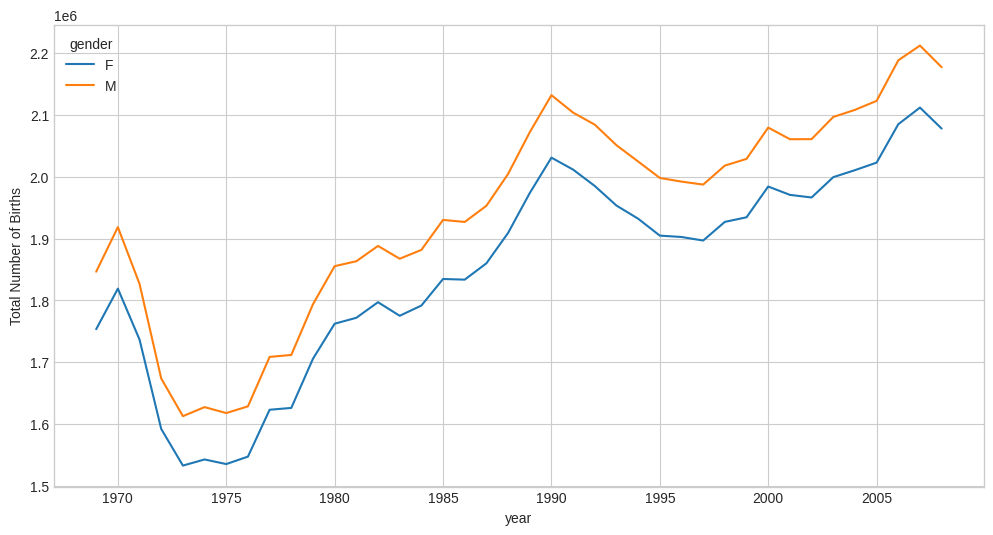

In [17]:
births.pivot_table('births', index = 'year', columns = 'gender', aggfunc = 'sum').plot(figsize = (12, 6))
plt.ylabel('Total Number of Births');

> sigma-clipping operation

In [18]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1] #median
sig = 0.74 * (quartiles[2] - quartiles[0]) #robust estinate of sample std using gaussian distro

In [19]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [20]:
births['day'] = births['day'].astype(int)

In [21]:
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

In [30]:
plt.gca?

Signature: plt.gca() -> 'Axes'
Docstring:
Get the current Axes.

If there is currently no Axes on this Figure, a new one is created
using `.Figure.add_subplot`.  (To test whether there is currently an
Axes on a Figure, check whether ``figure.axes`` is empty.  To test
whether there is currently a Figure on the pyplot figure stack, check
whether `.pyplot.get_fignums()` is empty.)

Notes
-----

.. note::

    This is the :ref:`pyplot wrapper <pyplot_interface>` for `.Figure.gca`.
File:      /mnt/sdcard/WORK/Data_Analysis/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py
Type:      function

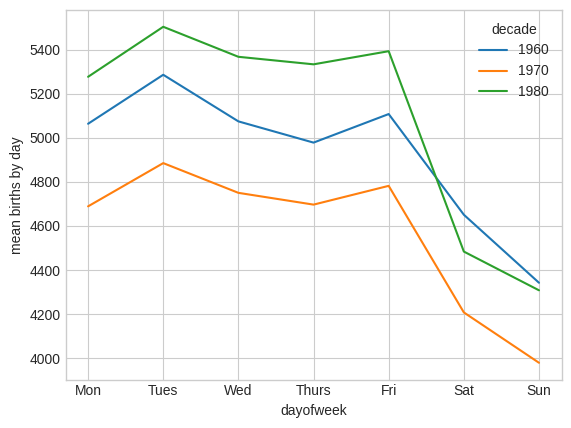

In [23]:
import matplotlib as mpl
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set(xticks=range(7),
              xticklabels=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [24]:
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [25]:
from datetime import datetime
births_by_date.index = [datetime(2012, month, day)
                        for (month, day) in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


<Axes: >

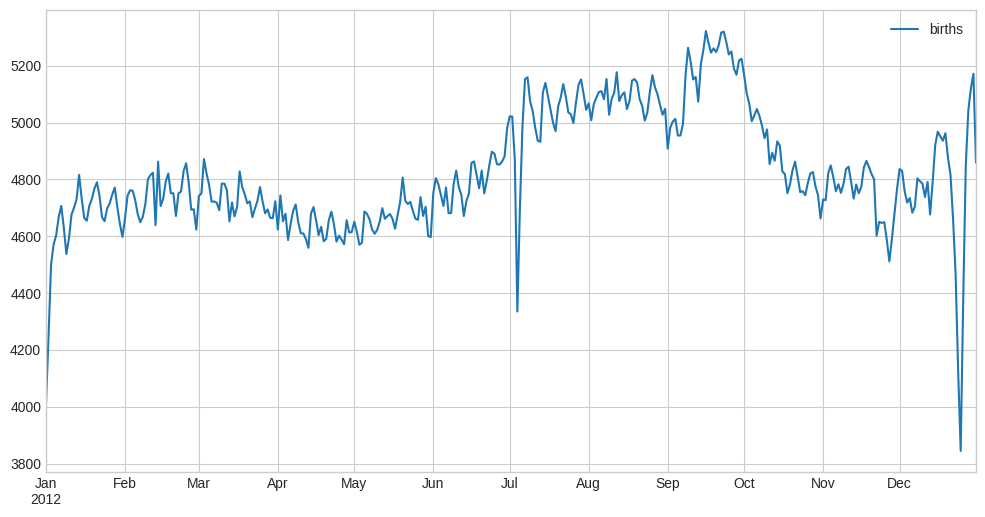

In [26]:
births_by_date.plot(figsize = (12, 6))